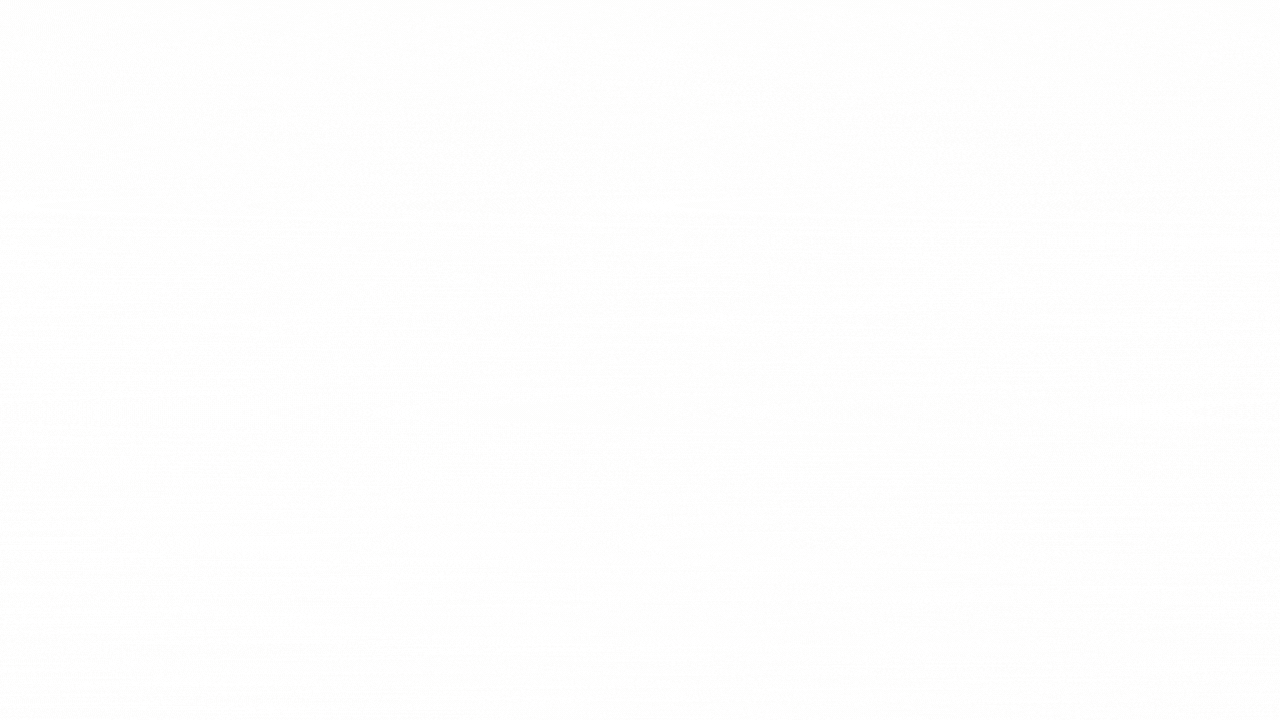

In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the dataset
data = pd.read_csv('Fertilizer Prediction.csv')
data.head()

In [ ]:
data.info()

In [ ]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [ ]:
#checking unique values
data.nunique()

In [ ]:
#checking for null values
data.isna().sum()

In [ ]:
#statistical parameters
data.describe(include='all')

In [ ]:
data['Soil_Type'].unique()

In [ ]:
import seaborn as sns
sns.countplot(x='Soil_Type', data = data)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Crop_Type', data = data)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer', data = data)

In [ ]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.Fertilizer)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

In [ ]:
#EDA - Temparature variable
plot_conti(data.Temparature)

In [ ]:
#EDA - Humidity variable
plot_conti(data.Humidity)

In [ ]:
#EDA - Moisture variable
plot_conti(data.Moisture)

In [ ]:
#EDA - Soil_Type variable
plot_cato(data.Soil_Type)

In [ ]:
#relation of soil type with Temperature 
plt.figure(figsize=(10,5))
sns.boxplot(x=data.Soil_Type,y=data.Temparature)

In [ ]:
#relation of soil type and Temperature with output variable
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Soil_Type,y=data.Temparature,hue=data.Fertilizer)

In [ ]:
#EDA - Crop_Type variable
plot_cato(data.Crop_Type)

In [ ]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=data.Crop_Type,y=data.Temparature)

In [ ]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Humidity)

In [ ]:
#EDA - Nitrogen variable
plot_conti(data.Nitrogen)

In [ ]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=data.Crop_Type,y=data.Nitrogen)

In [ ]:
#EDA - Potassium variable
plot_conti(data.Potassium)

In [ ]:
#EDA - Phosphorous variable
plot_conti(data.Phosphorous)

In [ ]:
data.head()

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.isnull().sum()

In [ ]:
sns.set_palette('Set3')
plt.figure(figsize=(16,9))
sns.countplot(data=data,x = 'Fertilizer')

In [ ]:
import scipy.stats as stats

In [ ]:
def visualise(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color = 'pink')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color = 'pink')
    
    plt.show()

In [ ]:
def quantile(df,val):
    a = []
    df_25 = df[val].quantile(0.25)
    df_75 = df[val].quantile(0.75)
    iqr = df_75-df_25
    upper_limit = float(df_75+(iqr*1.5))
    lower_limit = float(df_25-(iqr*1.5))
    for i in df[val]:
        if i>upper_limit:
            i = np.NaN
        elif i<lower_limit:
            i = np.NaN
        else:
            i = i
        a.append(i)
    return a

In [ ]:
temp = data.copy()

In [ ]:
upper_list = []
lower_list = []

In [ ]:
j = 0

In [ ]:
dummy

This shows that there are no outliers in the whole dataset.

# One-Hot Encoder

In [ ]:
y = data['Fertilizer'].copy()
X = data.drop('Fertilizer', axis=1).copy()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X[0]

# Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

### ML ALGO 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

# Decision Tree

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

In [ ]:
print(X_train.shape,y_train.shape)
DecisionTree.fit(X_train,y_train)

In [ ]:
predicted_values = DecisionTree.predict(X_test)

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
acc.append(x)

In [ ]:
model.append('DT')

In [ ]:
print("DecisionTrees's Accuracy is: ", x*100)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_values))

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, data, data.iloc[:,-1],cv=5)

In [ ]:
np.mean(score)

## Extra Tree Classifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier
ExtraTreeClassifier = ExtraTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

In [ ]:
ExtraTreeClassifier.fit(X_train,y_train)

In [ ]:
predicted_values = ExtraTreeClassifier.predict(X_test)

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
acc.append(x)
model.append('ETC')

In [ ]:
print("ExtraTreeClassifier's Accuracy is: ", x*100)

In [ ]:

print(classification_report(y_test,predicted_values))

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(ExtraTreeClassifier, data,  data.iloc[:,-1],cv=5)

In [ ]:
score.mean()*100

# Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NaiveBayes = GaussianNB()

In [ ]:
NaiveBayes.fit(X_train,y_train)

In [ ]:
predicted_values = NaiveBayes.predict(X_test)

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
acc.append(x)

In [ ]:
model.append('NB')

In [ ]:
print("Naive Bayes's Accuracy is: ", x)

In [ ]:
print(classification_report(y_test,predicted_values))

In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,data,data.iloc[:,-1],cv=5)

In [ ]:
score.mean()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train,y_train)

In [ ]:
predicted_values = SVM.predict(X_test)

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
acc.append(x)
model.append('SVM')

In [ ]:
print("SVM's Accuracy is: ", x)

In [ ]:
print(classification_report(y_test,predicted_values))

In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,data,data.iloc[:,-1],cv=5)


In [ ]:
score.mean()*100

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogReg = LogisticRegression(random_state=2)

In [ ]:
LogReg.fit(X_train,y_train)

In [ ]:
predicted_values = LogReg.predict(X_test)

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
acc.append(x)
model.append('Logistic Regression')

In [ ]:
print("Logistic Regression's Accuracy is: ", x)


In [ ]:

print(classification_report(y_test,predicted_values))

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,data,data.iloc[:,-1],cv=5)

In [ ]:
score.mean()*100

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
XB = xgb.XGBClassifier()

In [ ]:
XB.fit(X_train,y_train)

In [ ]:

predicted_values = XB.predict(X_test)

In [ ]:

x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:

acc.append(x)
model.append('XGBoost')

In [ ]:

print("XGBoost's Accuracy is: ", x)

In [ ]:
print(classification_report(y_test,predicted_values))

In [ ]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,data,data.iloc[:,-1],cv=5)


In [ ]:
score.mean()*100

## GradientBootsting Classifier

In [ ]:
GBC = GradientBoostingClassifier(n_estimators=20, random_state=0)

In [ ]:
GBC.fit(X_train,y_train)

In [ ]:

predicted_values = GBC.predict(X_test)

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
acc.append(x)
model.append('GBC')

In [ ]:
print("GBC's Accuracy is: ", x)

In [ ]:
print(classification_report(y_test,predicted_values))

In [ ]:
# Cross validation score (GradientBoostingClassifier)
score = cross_val_score(GBC,data,data.iloc[:,-1],cv=5)


In [ ]:
score.mean()*100

## K Nearest Neighbors

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
KNN.fit(X_train,y_train)

In [ ]:
predicted_values = KNN.predict(X_test)

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
acc.append(x)
model.append('KNN')

In [ ]:
print("KNN's Accuracy is: ", x)

In [ ]:

print(classification_report(y_test,predicted_values))

In [ ]:
# Cross validation score (GradientBoostingClassifier)
score = cross_val_score(KNN,data,data.iloc[:,-1],cv=5)


In [ ]:
score.mean()*100

## Stochastic Gradient Descent Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
SGD=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

In [ ]:
SGD.fit(X_train,y_train)

In [ ]:
predicted_values = SGD.predict(X_test)

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values)

In [ ]:
acc.append(x)
model.append('SGD')

In [ ]:

print("SGD's Accuracy is: ", x)


In [ ]:

print(classification_report(y_test,predicted_values))

In [ ]:
data[:-1]

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(SGD,data,data.iloc[:,-1],cv=5)
score.mean()**100

In [ ]:
accuracy_models = dict(zip(model, acc))

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x =model,y = acc,palette='dark',orient='v')

In [ ]:
for k, v in accuracy_models.items():
    print (k, '-->', v)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

# Creating confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
classifier.score(X_test, y_test)

**Test accuracy = 96.67%**

In [ ]:
# Preprocessing using Label Encoder

In [ ]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder


In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data['Fertilizer'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

In [ ]:
x_train.info()

In [ ]:
logistic.get_params().keys()

**Best score = 97.48%**

In [ ]:
y_train[2]

In [ ]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [ ]:
data.head()

In [ ]:
model = pickle.load(open('classifier.pkl','rb'))
ans = model.predict([[34,65,62	,0,	1,	7,	9,	30]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")

In [ ]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [ ]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

In [ ]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

In [ ]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

In [ ]:
x_train.info()

## Deep Learning 

In [ ]:
import pandas as pd
data=pd.read_csv('Fertilizer Prediction.csv')
data = data.astype({'Fertilizer Name':'string'})
features=data.drop("Fertilizer Name",axis=1)
target=data["Fertilizer Name"]

In [ ]:
features.shape

In [ ]:
target.describe()

In [ ]:
data.head()

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
features.head()

In [ ]:
import tensorflow as tf
import pandas as pd
#Split the data set into training data and test data
data=pd.read_csv('Fertilizer Prediction.csv')
features=data.drop('Fertilizer Name',axis=1)
target=data['Fertilizer Name']
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
features['Soil Type']=label_encoder.fit_transform(features['Soil Type'])
features['Crop Type']=label_encoder.fit_transform(features['Crop Type'])
target= label_encoder.fit_transform(target)

from sklearn.model_selection import train_test_split

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(features,target, test_size = 0.3)

#Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_training_data = scaler.fit_transform(x_training_data)

x_test_data = scaler.fit_transform(x_test_data)

#Building The Neural Network

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #First hidden layer

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) #Second hidden layer

ann.add(tf.keras.layers.Dense(units=1))#Output layer

#Compiling the neural network

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Training the neural network

ann.fit(x_training_data, y_training_data, batch_size = 32, epochs = 100)

#Making predictions with the artificial neural network

ann.predict(scaler.transform(x_test_data))

#Generate predictions from our test data

predictions = ann.predict(x_test_data)

